<a href="https://colab.research.google.com/github/koushikac/Data_science-Assignments/blob/main/car_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 8**

**How Much Is Your Car Worth?**

Data about the retail price of 2005 General Motors cars can be found in car_data.csv.

The columns are:

1.Price: suggested retail price of the used 2005 GM car in excellent condition.


2.Mileage: number of miles the car has been driven

3.Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet

4.Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier

5.Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D

6.Type: body type such as sedan, coupe, etc.

7.Cylinder: number of cylinders in the engine

8.Liter: a more specific measure of engine size

9.Doors: number of doors

10.Cruise: indicator variable representing whether the car has cruise control (1 = cruise)

11.Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)

12.Leather: indicator variable representing whether the car has leather seats (1 = leather)

**Task,Part 1**

1.Find the linear regression equation for mileage vs price.

2.Chart the original data and the equation on the chart.

3.Find the equation's R2 score (use the .score method) to deterine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

**Task,Part 2**

1.Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

2.Find the equation's  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

3.Find the combination of the factors that is the best predictor for price.

**Task, Hard Mode**

1.Research dummy variables in scikit-learn to see how to use the make, model, and body type.

2.Find the best combination of factors to predict price.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [1]:
!ls

car_data.csv  sample_data


In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


**Data Cleaning & Exploration**

In [5]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [6]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

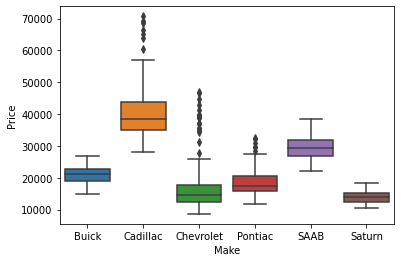

In [8]:
sns.boxplot(x="Make", y="Price", data=df);

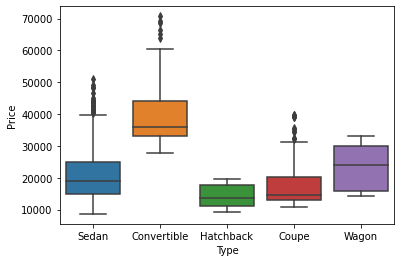

In [9]:
sns.boxplot(x="Type", y="Price", data=df);

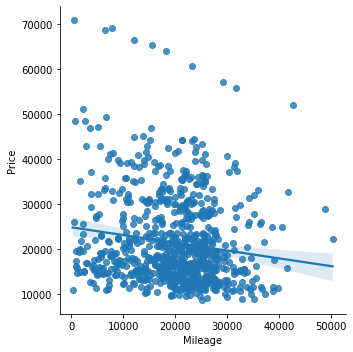

In [10]:
sns.lmplot(x="Mileage", y="Price", data=df);

In [11]:
#1. Find the linear regression equation for mileage vs price.
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df[["Mileage"]]
y = df["Price"]
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

print('R2- SCORE:', metrics.r2_score(y,y_pred))
print(model.coef_, model.intercept_)

R2- SCORE: 0.02046344732348926
[-0.1725205] 24764.559006061685


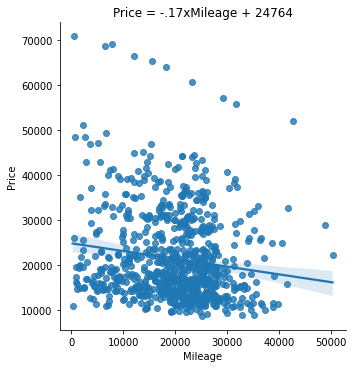

In [12]:
#2. Chart the original data and the equation on the chart.
sns.lmplot(x="Mileage", y="Price", data=df)
plt.title("Price = -.17xMileage + 24764")
plt.show()

In [13]:
# Find the equation's R2 score (use the .score method) 
# to determine whether the equation is a good fit for this data. 
# (0.8 and greater is considered a strong correlation.)
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.02046344732348926


R2 score is low and we can conclude that there is no linear relationship between Mileage and the Price.

In [14]:
df.head(1)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


In [15]:
#1. Use mileage, cylinders, liters, doors, cruise, sound, and leather 
# to find the linear regression equation.
X = df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]]
y = df["Price"]

model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

print('R2- SCORE:', metrics.r2_score(y,y_pred))
print("Model Coef:",model.coef_, "Model Intercept:",model.intercept_)

R2- SCORE: 0.4462643536728379
Model Coef: [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03] Model Intercept: 6758.755143598106


In [ ]:
# R2 value is 0.44. So, the model is moderately good.

In [16]:
#3. Find the combination of the factors that is the best predictor for price.
df.corr()["Price"]

Price       1.000000
Mileage    -0.143051
Cylinder    0.569086
Liter       0.558146
Doors      -0.138750
Cruise      0.430851
Sound      -0.124348
Leather     0.157197
Name: Price, dtype: float64

Ans: From the correlation analysis, it is evident that "Cylinder","Liter" and "Cruise" are the three most important factors to decide the car price.

In [ ]:
#Ans: From the correlation analysis, it is evident that "Cylinder","Liter" and "Cruise" are the three most important factors to decide the car price.

In [17]:
df_cylinder = df.groupby(by="Cylinder",as_index = False).mean()[["Cylinder","Price"]]
df_cylinder

,Cylinder,Price
0,4,17862.564874
1,6,20081.395841
2,8,38968.043180


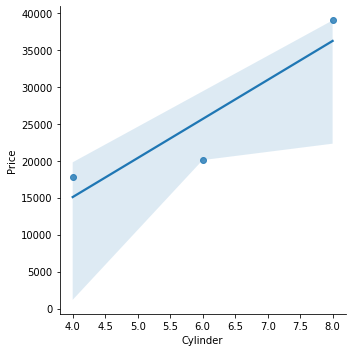

In [18]:
sns.lmplot(x="Cylinder", y="Price", data=df_cylinder);

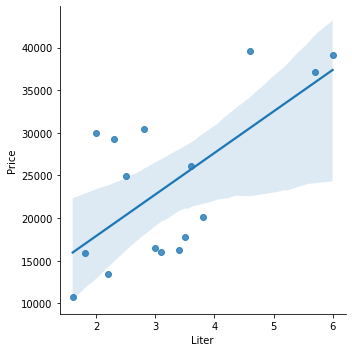

In [19]:
df_liter = df.groupby(by="Liter",as_index = False).mean()[["Liter","Price"]]
sns.lmplot(x="Liter", y="Price", data=df_liter);

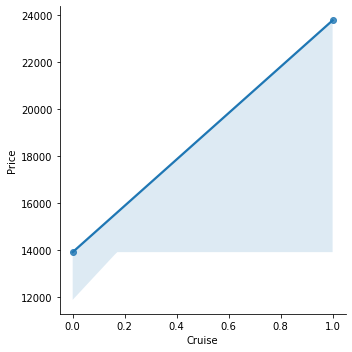

In [20]:
df_cruise = df.groupby(by="Cruise",as_index = False).mean()[["Cruise","Price"]]
sns.lmplot(x="Cruise", y="Price", data=df_cruise);

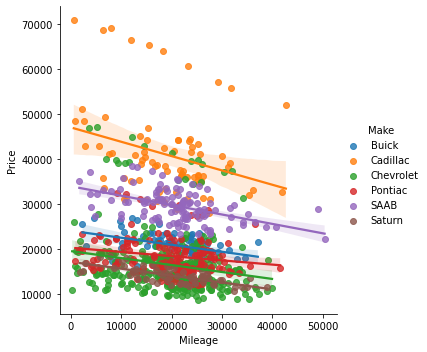

In [21]:
# Research dummy variables in scikit-learn to see how to use the make, model, and body type.
# Find the best combination of factors to predict price.

sns.lmplot(x="Mileage", y="Price", data=df, hue="Make");

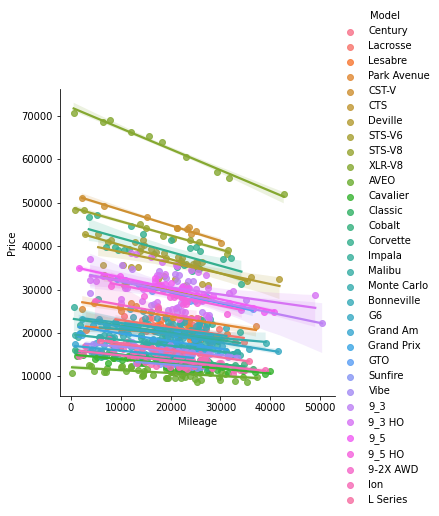

In [22]:
sns.lmplot(x="Mileage", y="Price", data=df, hue="Model");


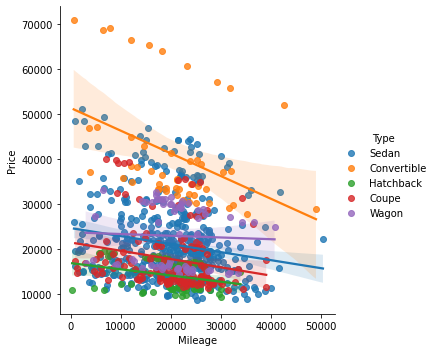

In [23]:
sns.lmplot(x="Mileage", y="Price", data=df, hue="Type");

In [ ]:
# It can be seen that the relation between the 
# Mileage and price is pretty linear if we categorize according to Make, Model or "Type"

In [24]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [25]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [26]:
X.shape, y.shape

((804, 11), (804,))

In [27]:
# Train Test Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=10, 
                                   test_size=0.25) 

In [28]:
# Label encoding
from sklearn import preprocessing
cols = ["Make","Model","Trim","Type"]
le = preprocessing.LabelEncoder()
for name in cols:
  X_train[name]= le.fit_transform(X_train[name])
  X_test[name] = le.transform(X_test[name])

In [29]:
X_train.head()

,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
441,11393,2,24,44,3,6,3.5,4,1,1,1
414,18451,2,24,30,2,6,3.5,4,0,1,1
7,22964,0,10,44,3,6,3.1,4,1,1,0
345,23826,2,13,10,0,8,6.0,2,1,1,1
726,23055,4,4,2,3,4,2.3,4,1,1,1


In [30]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [31]:
X_train[:1]

array([[-1.06446186, -0.2974015 ,  1.04120616,  1.19847063,  0.49248578,
         0.49851015,  0.39087017,  0.54732894,  0.54988709,  0.70710678,
         0.6342914 ]])

In [32]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
print(model.coef_, model.intercept_)

R2- SCORE: 0.5020084903423292
[-1342.4494184    969.09982667 -1678.66031278 -1585.24664987
   -88.84498245  6703.54979352 -1072.69519951  -749.78976841
  1956.28270118  -594.72926912  1226.56584811] 21481.243387215767


In [33]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [ ]:
#Coefficients
# Mileage: -1342 (5)
# Make: 969 (8)
# Model: -1678 (3)
# Trim: -1585 (4)
# Type: -88 (11)
# Cylinder: 6703 (1)
# Liter: -1072 (7)
# Doors: -749 (9)
# Cruise: 1956 (2)
# Sound: -594 (10)
# Leather: 1226 (6)

# 5 most important features to detrmine the features are
# Cylinder, Cruise, Model, Trim, Mileage